In [1]:
import seaborn as sns
import pandas as pd

df = sns.load_dataset('titanic')
print(df.head())
print(df.info())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-nu

In [2]:
survival_by_class = df.groupby('pclass')['survived'].mean()

pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64


<Axes: xlabel='pclass', ylabel='survived'>

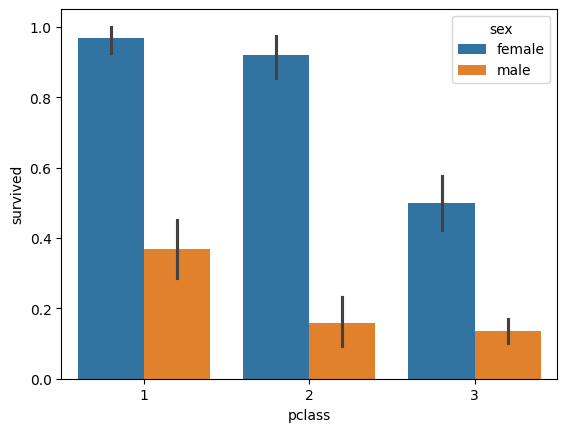

In [3]:

print(survival_by_class)


sns.barplot(data=df,x='pclass',y='survived',hue='sex')

In [5]:
df['age'].fillna(df['age'].mean(), inplace=True)

df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)

df.drop(columns=['deck'],inplace=True)

print(df.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64


C:\Users\francis\AppData\Local\Temp\ipykernel_3508\2761866421.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)


C:\Users\francis\AppData\Local\Temp\ipykernel_3508\2558556494.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)


<Axes: xlabel='age', ylabel='survived'>

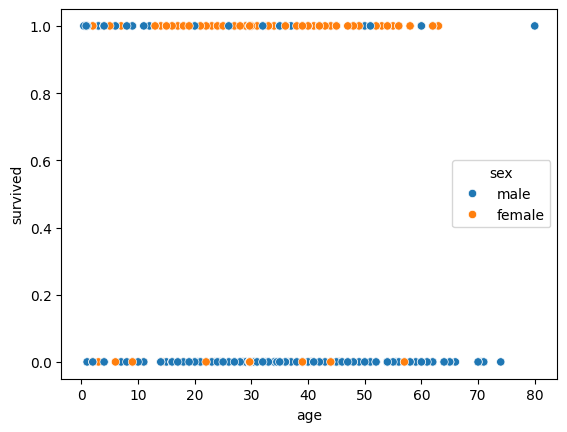

In [13]:
# Clean data
df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)


# Now plot age vs survival
sns.scatterplot(data=df, x='age', y='survived', hue='sex')

In [14]:
corr = df.corr(numeric_only=True)
print(corr)

            survived    pclass       age     sibsp     parch      fare  \
survived    1.000000 -0.338481 -0.069809 -0.035322  0.081629  0.257307   
pclass     -0.338481  1.000000 -0.331339  0.083081  0.018443 -0.549500   
age        -0.069809 -0.331339  1.000000 -0.232625 -0.179191  0.091566   
sibsp      -0.035322  0.083081 -0.232625  1.000000  0.414838  0.159651   
parch       0.081629  0.018443 -0.179191  0.414838  1.000000  0.216225   
fare        0.257307 -0.549500  0.091566  0.159651  0.216225  1.000000   
adult_male -0.557080  0.094035  0.253236 -0.253586 -0.349943 -0.182024   
alone      -0.203367  0.135207  0.179775 -0.584471 -0.583398 -0.271832   

            adult_male     alone  
survived     -0.557080 -0.203367  
pclass        0.094035  0.135207  
age           0.253236  0.179775  
sibsp        -0.253586 -0.584471  
parch        -0.349943 -0.583398  
fare         -0.182024 -0.271832  
adult_male    1.000000  0.404744  
alone         0.404744  1.000000  


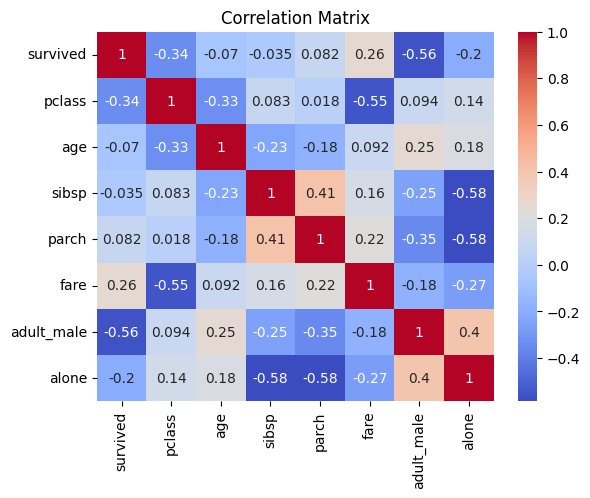

In [15]:
import matplotlib.pyplot as plt
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

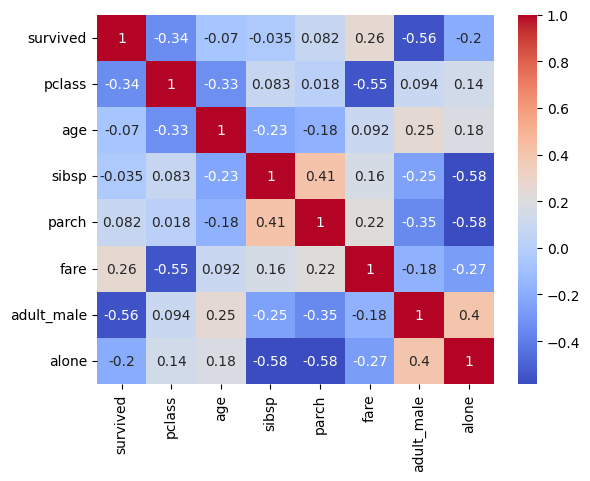

In [16]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

In [17]:
import numpy as np

In [18]:
df['age_group'] = np.where(df['age'] < 18, 'child','adult' )

In [19]:
# Survival prediction based on logic (simple rule)
df['predicted_survival'] = np.where((df['sex'] == 'female') & (df['pclass'] < 3), 1, 0)

In [20]:
print(df['predicted_survival'].value_counts())

predicted_survival
0    721
1    170
Name: count, dtype: int64
